In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('dataset6.csv')

In [3]:
dataset

,Min. Temperature(C),Humidity(%),Rainfall,Crop
0,16,85,150,Rice
1,21,95,100,Wheat
2,15,80,140,Rice
3,20,95,150,Wheat
4,23,70,200,Rice
5,25,87,160,Wheat
6,22,79,135,Rice
7,24,93,145,Wheat
8,19,99,210,Rice
9,25,87,190,Wheat


In [4]:
x = dataset.iloc[:,:-1].values

In [5]:
x

array([[ 16,  85, 150],
       [ 21,  95, 100],
       [ 15,  80, 140],
       [ 20,  95, 150],
       [ 23,  70, 200],
       [ 25,  87, 160],
       [ 22,  79, 135],
       [ 24,  93, 145],
       [ 19,  99, 210],
       [ 25,  87, 190],
       [ 22,  60, 200],
       [ 24,  93, 145]], dtype=int64)

In [6]:
x.shape

(12, 3)

In [7]:
y = dataset.iloc[:,3:].values

In [8]:
y

array([['Rice'],
       ['Wheat'],
       ['Rice'],
       ['Wheat'],
       ['Rice'],
       ['Wheat'],
       ['Rice'],
       ['Wheat'],
       ['Rice'],
       ['Wheat'],
       ['Rice'],
       ['Wheat']], dtype=object)

In [9]:
y.shape

(12, 1)

In [10]:
dataset.corr()

,Min. Temperature(C),Humidity(%),Rainfall
Min. Temperature(C),1.000000,-0.014383,0.169878
Humidity(%),-0.014383,1.000000,-0.370039
Rainfall,0.169878,-0.370039,1.000000


In [11]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
y[:,0]=lb.fit_transform(y[:,0])

In [12]:
y

array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1]], dtype=object)

In [13]:
from sklearn.preprocessing import OneHotEncoder
oh1=OneHotEncoder(categorical_features=[0])
y=oh1.fit_transform(y).toarray()

C:\Users\geethageethi\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\geethageethi\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [15]:
x_train

array([[ 22,  60, 200],
       [ 15,  80, 140],
       [ 19,  99, 210],
       [ 21,  95, 100],
       [ 24,  93, 145],
       [ 25,  87, 190],
       [ 20,  95, 150],
       [ 16,  85, 150],
       [ 25,  87, 160]], dtype=int64)

In [16]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [17]:
x_test

array([[ 22,  79, 135],
       [ 24,  93, 145],
       [ 23,  70, 200]], dtype=int64)

In [18]:
y_test

array([[1., 0.],
       [0., 1.],
       [1., 0.]])

In [19]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [20]:
y_pred=classifier.predict(x_test)

In [21]:
y_pred

array([[1., 0.],
       [0., 1.],
       [1., 0.]])

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_test,y_pred)

1.0

In [24]:
from sklearn.linear_model import LinearRegression
mr=LinearRegression()

In [25]:
mr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
y_predict=mr.predict(x_test)

In [27]:
y_predict

array([[ 0.22953816,  0.77046184],
       [-0.12211288,  1.12211288],
       [ 0.70058544,  0.29941456]])

In [28]:
mr.predict([[22,79,135]])

array([[0.22953816, 0.77046184]])

In [30]:
import seaborn as sns   

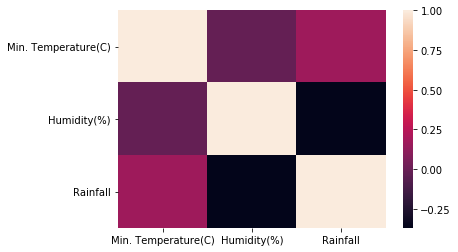

In [31]:
sns.heatmap(dataset.corr())